<a href="https://colab.research.google.com/github/PedroAugustMendes/Modelo-de-classifica-o-para-an-lise-de-cr-dito/blob/main/KNNCreditCard(NEW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análise possíveis fraudes em cartões de crédito***

In [1]:
#Importação de bibliotecas necessárias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as LabelEncoder

##Importação de bibliotecas. Especificando suas utilidades e usabilidades


pandas:

Função: O pandas é uma biblioteca de análise de dados que fornece estruturas de dados e ferramentas para manipulação e análise de dados em Python.
Funcionalidade: Ele oferece estruturas de dados como DataFrames e Series, que facilitam a leitura, manipulação e análise de dados tabulares, como tabelas de banco de dados ou planilhas. O pandas é amplamente usado para preparação de dados e análise exploratória.
numpy:

Função: O NumPy é uma biblioteca numérica para Python que fornece suporte para arrays multidimensionais e funções matemáticas para trabalhar com esses arrays.
Funcionalidade: O NumPy é essencial para computação numérica e científica em Python. Ele oferece eficiência na manipulação de arrays, cálculos matemáticos e álgebra linear, sendo a base para muitas outras bibliotecas científicas em Python.
seaborn:

Função: O Seaborn é uma biblioteca de visualização de dados baseada no matplotlib que fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
Funcionalidade: O Seaborn simplifica a criação de gráficos estatísticos, como gráficos de dispersão, histogramas, gráficos de barras e muito mais. Ele é especialmente útil para a visualização de dados em análise exploratória e comunicação de resultados.
matplotlib.pyplot:

Função: O matplotlib é uma biblioteca de visualização de dados em Python que oferece controle detalhado sobre gráficos e figuras.
Funcionalidade: O matplotlib.pyplot fornece uma interface de alto nível para criar gráficos e visualizações de dados. Você pode criar gráficos de linha, gráficos de dispersão, gráficos de barra, histogramas e muito mais. É amplamente usado em ciência de dados e análise de dados.
sklearn.preprocessing:

Função: Essa parte do scikit-learn (também conhecido como sklearn) se concentra na pré-processamento de dados, como a normalização e codificação de variáveis.
Funcionalidade: O sklearn.preprocessing oferece várias ferramentas para preparar seus dados antes de aplicar algoritmos de aprendizado de máquina. Isso inclui normalização, escalonamento, codificação de variáveis categóricas, tratamento de valores ausentes e muito mais.


In [3]:
#Fazendo a importação do DataFrame
df = pd.read_csv("/content/sample_data/creditcard.csv")
#Exibindo a dimensão dos dados
print("Dimensão dos dados")
print("Linhas: (Instâncias) | Colunas: (Atributos) ", df.shape)

Dimensão dos dados
Linhas: (Instâncias) | Colunas: (Atributos)  (1986, 31)


Importação do DataFrame:

df = pd.read_csv("/content/sample_data/creditcard.csv"): Nesta linha, um DataFrame é criado a partir de um arquivo CSV chamado "creditcard.csv". O arquivo é lido e os dados são carregados em um DataFrame chamado df. O caminho para o arquivo é "/content/sample_data/creditcard.csv". Este é um passo comum para carregar dados de um arquivo CSV em um ambiente Python, utilizando a biblioteca pandas.
Exibindo a dimensão dos dados:

print("Dimensão dos dados"): Isso imprime a mensagem "Dimensão dos dados" no console para indicar que a próxima saída se refere à dimensão dos dados.
print("Linhas: (Instâncias) | Colunas: (Atributos) ", df.shape): Esta linha imprime a dimensão dos dados contidos no DataFrame df. O df.shape é uma tupla que retorna o número de linhas (instâncias) e o número de colunas (atributos) no DataFrame. Isso é útil para ter uma ideia do tamanho e estrutura dos dados carregados.

In [4]:
#Exibindo as primeiras 20 linhas da base de dados
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


Exibição das primeiras 20 linhas da base de dados atráves da utilização da função 'head(x)', onde x é o parâmetro que indica a quantidade de linhas da DataBase que deve ser exibida.

In [31]:
#Resumo estatístico da variavel amount
print(df['Amount'].describe())

count    1985.000000
mean       68.602469
std       241.677019
min         0.000000
25%         4.950000
50%        15.090000
75%        63.650000
max      7712.430000
Name: Amount, dtype: float64


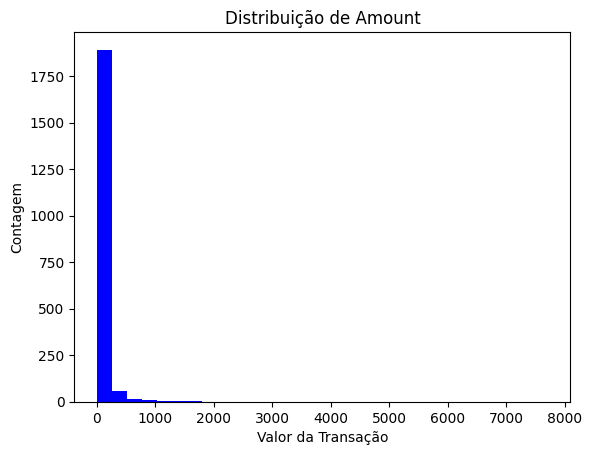

In [32]:
# Histograma da variável 'Amount'
plt.hist(df['Amount'], bins=30, color='blue')
plt.xlabel('Valor da Transação')
plt.ylabel('Contagem')
plt.title('Distribuição de Amount')
plt.show()

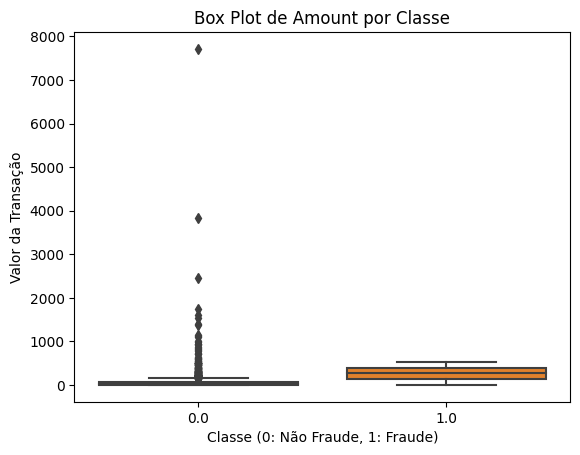

In [33]:
# Box plot da variável 'Amount'
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Classe (0: Não Fraude, 1: Fraude)')
plt.ylabel('Valor da Transação')
plt.title('Box Plot de Amount por Classe')
plt.show()

In [37]:
# Estatísticas descritivas da variável 'Amount' para fraudes
fraud_df = df[df['Class'] == 1]
print(fraud_df['Amount'].describe())

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64


In [38]:
# Correlações lineares de Pearson entre variáveis numéricas e 'Class'
correlation_with_fraud = df.corrwith(df['Class']).sort_values(ascending=False)
print(correlation_with_fraud)

Class     1.000000
V4        0.075246
V20       0.058827
V23       0.044866
V18       0.043743
V11       0.041120
V15       0.035533
V21       0.029231
Amount    0.025749
V8        0.023692
V22       0.018607
V5        0.012384
V19       0.011728
V13       0.006472
V25       0.004189
V24      -0.000035
V27      -0.001978
V26      -0.002320
V16      -0.005254
V28      -0.006023
Time     -0.022664
V2       -0.024171
V6       -0.032304
V7       -0.034638
V3       -0.034765
V17      -0.048281
V9       -0.054104
V1       -0.056174
V10      -0.059568
V12      -0.095709
V14      -0.117208
dtype: float64


A correlação linear é uma medida estatística que avalia a força e a direção do relacionamento entre duas variáveis numéricas. Ela varia de -1 a 1, indicando o grau de associação entre as variáveis. Aqui estão algumas interpretações comuns da correlação linear:

Correlação Positiva (próxima de 1):

Significado: À medida que uma variável aumenta, a outra também tende a aumentar.
Exemplo: Se a correlação entre o tempo gasto online e o valor gasto em compras online é 0,90, isso sugere que, em média, quanto mais tempo alguém passa online, mais dinheiro gasta.
Correlação Negativa (próxima de -1):

Significado: À medida que uma variável aumenta, a outra tende a diminuir.
Exemplo: Se a correlação entre a temperatura externa e o consumo de energia é -0,80, isso indica que, em média, à medida que a temperatura externa sobe, o consumo de energia tende a cair.
Correlação Próxima de 0:

Significado: Não há uma relação linear forte entre as variáveis.
Exemplo: Se a correlação entre a quantidade de café consumida e a probabilidade de chover for 0,05, isso sugere que não há uma relação linear forte entre essas variáveis.
Correlação Perfeita (1 ou -1):

Significado: Existe uma relação linear perfeita entre as variáveis. Isso é extremamente raro na prática.
Exemplo: Se a correlação entre o número de horas de estudo e a nota obtida em um teste for 1, isso significa que, para cada aumento nas horas de estudo, a nota aumenta na mesma proporção.
Significância Estatística:

Além do valor da correlação, é importante verificar se a correlação é estatisticamente significativa. Isso é geralmente feito por meio de testes de hipóteses, como o teste de significância de Pearson (teste t). Valores-p baixos indicam uma correlação estatisticamente significativa.

In [29]:
corr = df['Amount'].corr(df['V1'])
corr

-0.24006877723995812

O valor de correlação linear de -0.24006877723995812 indica uma correlação linear negativa entre as duas variáveis que estão sendo analisadas. Aqui está como interpretar esse valor:

Correlação Linear Negativa: O sinal negativo (-) indica que as duas variáveis têm uma relação linear negativa. Isso significa que, em geral, quando o valor de uma variável aumenta, o valor da outra variável tende a diminuir, e vice-versa. Em outras palavras, há uma tendência de movimento oposto entre as variáveis.

Magnitude da Correlação: O valor absoluto da correlação (-0.24006877723995812 sem o sinal negativo) varia de 0 a 1, onde 0 representa nenhuma correlação linear e 1 representa uma correlação linear perfeita. Quanto mais próximo o valor estiver de 1 (positivo ou negativo), mais forte é a correlação linear. No seu caso, o valor está relativamente próximo de zero, o que indica uma correlação fraca.

Interpretando a Magnitude: Uma correlação linear negativa com um valor próximo de -1 indicaria uma correlação negativa forte, enquanto um valor próximo de 0 indica uma correlação fraca. Portanto, no seu caso, o valor sugere uma correlação negativa relativamente fraca entre as variáveis.

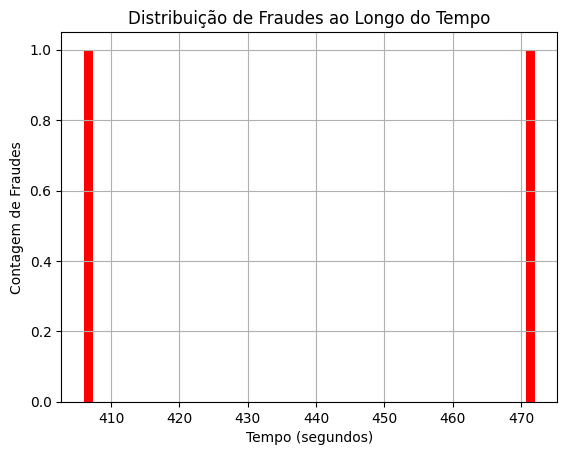

In [39]:
# Gráfico de barras da distribuição de fraudes ao longo do tempo
fraud_df['Time'].hist(bins=50, color='red')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Contagem de Fraudes')
plt.title('Distribuição de Fraudes ao Longo do Tempo')
plt.show()

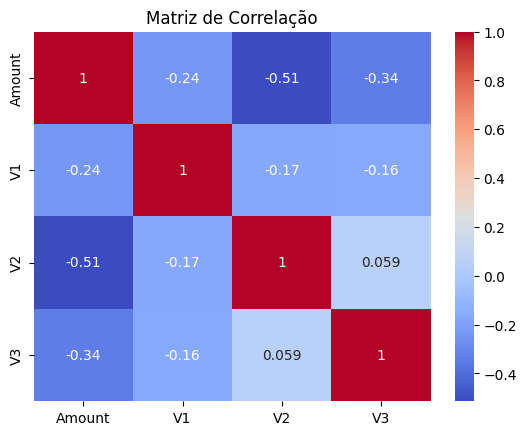

In [34]:
# Matriz de correlação de Pearson entre 'Amount' e as componentes principais
correlation_matrix = df[['Amount', 'V1', 'V2', 'V3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

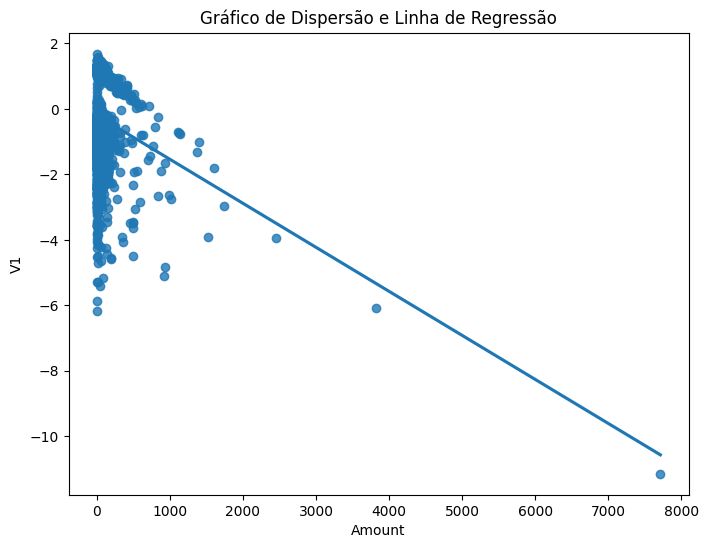

In [30]:
# Fazer um gráfico de dispersão com a linha de regressão
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Amount'], y=df['V1'], data=df, ci=None)
plt.title('Gráfico de Dispersão e Linha de Regressão')
plt.xlabel('Amount')
plt.ylabel('V1')
plt.show()

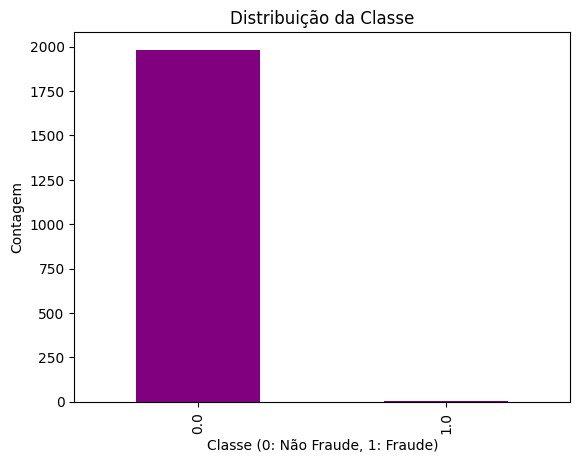

In [35]:
# Gráfico de barras da variável de resposta 'Class'
df['Class'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Classe (0: Não Fraude, 1: Fraude)')
plt.ylabel('Contagem')
plt.title('Distribuição da Classe')
plt.show()

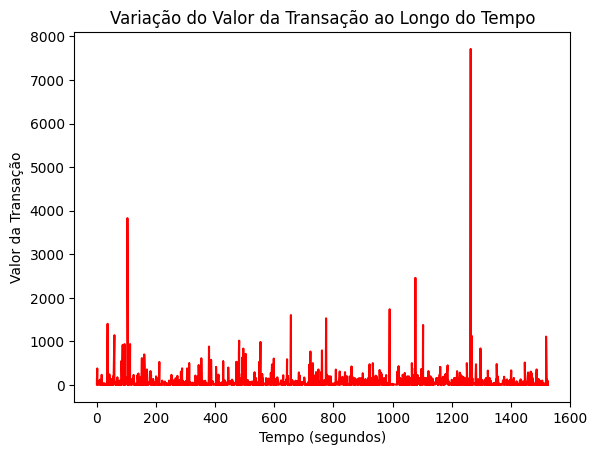

In [36]:
# Gráfico de linha para a variável 'Time' ao longo do tempo
plt.plot(df['Time'], df['Amount'], color='red')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Valor da Transação')
plt.title('Variação do Valor da Transação ao Longo do Tempo')
plt.show()

In [6]:
#Verificando a quantidade de elementos (NaN) inválidos estão presentes na base de dados
dados_faltantes = (df.isnull().sum)
print(dados_faltantes)

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1981  False  False  False  False  False  False  False  False  False  False   
1982  False  False  False  False  False  False  False  False  False  False   
1983  False  False  False  False  False  False  False  False  False  False   
1984  False  False  False  False  False  False  False  False  False  False   
1985  False  False  False  False  False  False  False  False  False  False   

 

In [7]:
#Verificando onde os dadso estão faltando
atributos_nulos = df.isnull()
print(atributos_nulos.head(10))

    Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   
5  False  False  False  False  False  False  False  False  False  False  ...   
6  False  False  False  False  False  False  False  False  False  False  ...   
7  False  False  False  False  False  False  False  False  False  False  ...   
8  False  False  False  False  False  False  False  False  False  False  ...   
9  False  False  False  False  False  False  False  False  False  False  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0  False  False  False  False  False  False 

In [8]:
#Criando um novo DataFrame para comparar a DB com e sem valores Nan.
df_2 = df.dropna()
df_2.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [9]:
#Comparando as Db - (Linhas, Colunas)
df.shape

(1986, 31)

In [10]:
df_2.shape

(1985, 31)

In [11]:
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,1985.0,760.650378,450.820513,0.000000,366.000000,750.000000,1161.000000,1525.000000
V1,1985.0,-0.283908,1.353789,-11.140706,-1.045669,-0.436905,1.095067,1.685314
V2,1985.0,0.266324,1.142039,-12.114213,-0.204418,0.313341,0.925973,6.118940
V3,1985.0,0.847788,1.012854,-12.389545,0.280285,0.864391,1.487102,4.017561
V4,1985.0,0.149823,1.263728,-4.657545,-0.671347,0.190288,1.002279,6.013346
V5,1985.0,-0.077404,1.272831,-32.092129,-0.576328,-0.154221,0.377362,7.672544
V6,1985.0,0.050406,1.274493,-3.498447,-0.691456,-0.197943,0.389937,21.393069
V7,1985.0,0.138279,1.141034,-4.925568,-0.287901,0.117003,0.569612,34.303177
V8,1985.0,-0.059044,0.966673,-12.258158,-0.172560,0.037486,0.279375,3.877662
V9,1985.0,0.012945,0.900348,-3.110515,-0.478856,-0.033188,0.450282,6.450992


In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1985 non-null   int64  
 1   V1      1985 non-null   float64
 2   V2      1985 non-null   float64
 3   V3      1985 non-null   float64
 4   V4      1985 non-null   float64
 5   V5      1985 non-null   float64
 6   V6      1985 non-null   float64
 7   V7      1985 non-null   float64
 8   V8      1985 non-null   float64
 9   V9      1985 non-null   float64
 10  V10     1985 non-null   float64
 11  V11     1985 non-null   float64
 12  V12     1985 non-null   float64
 13  V13     1985 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

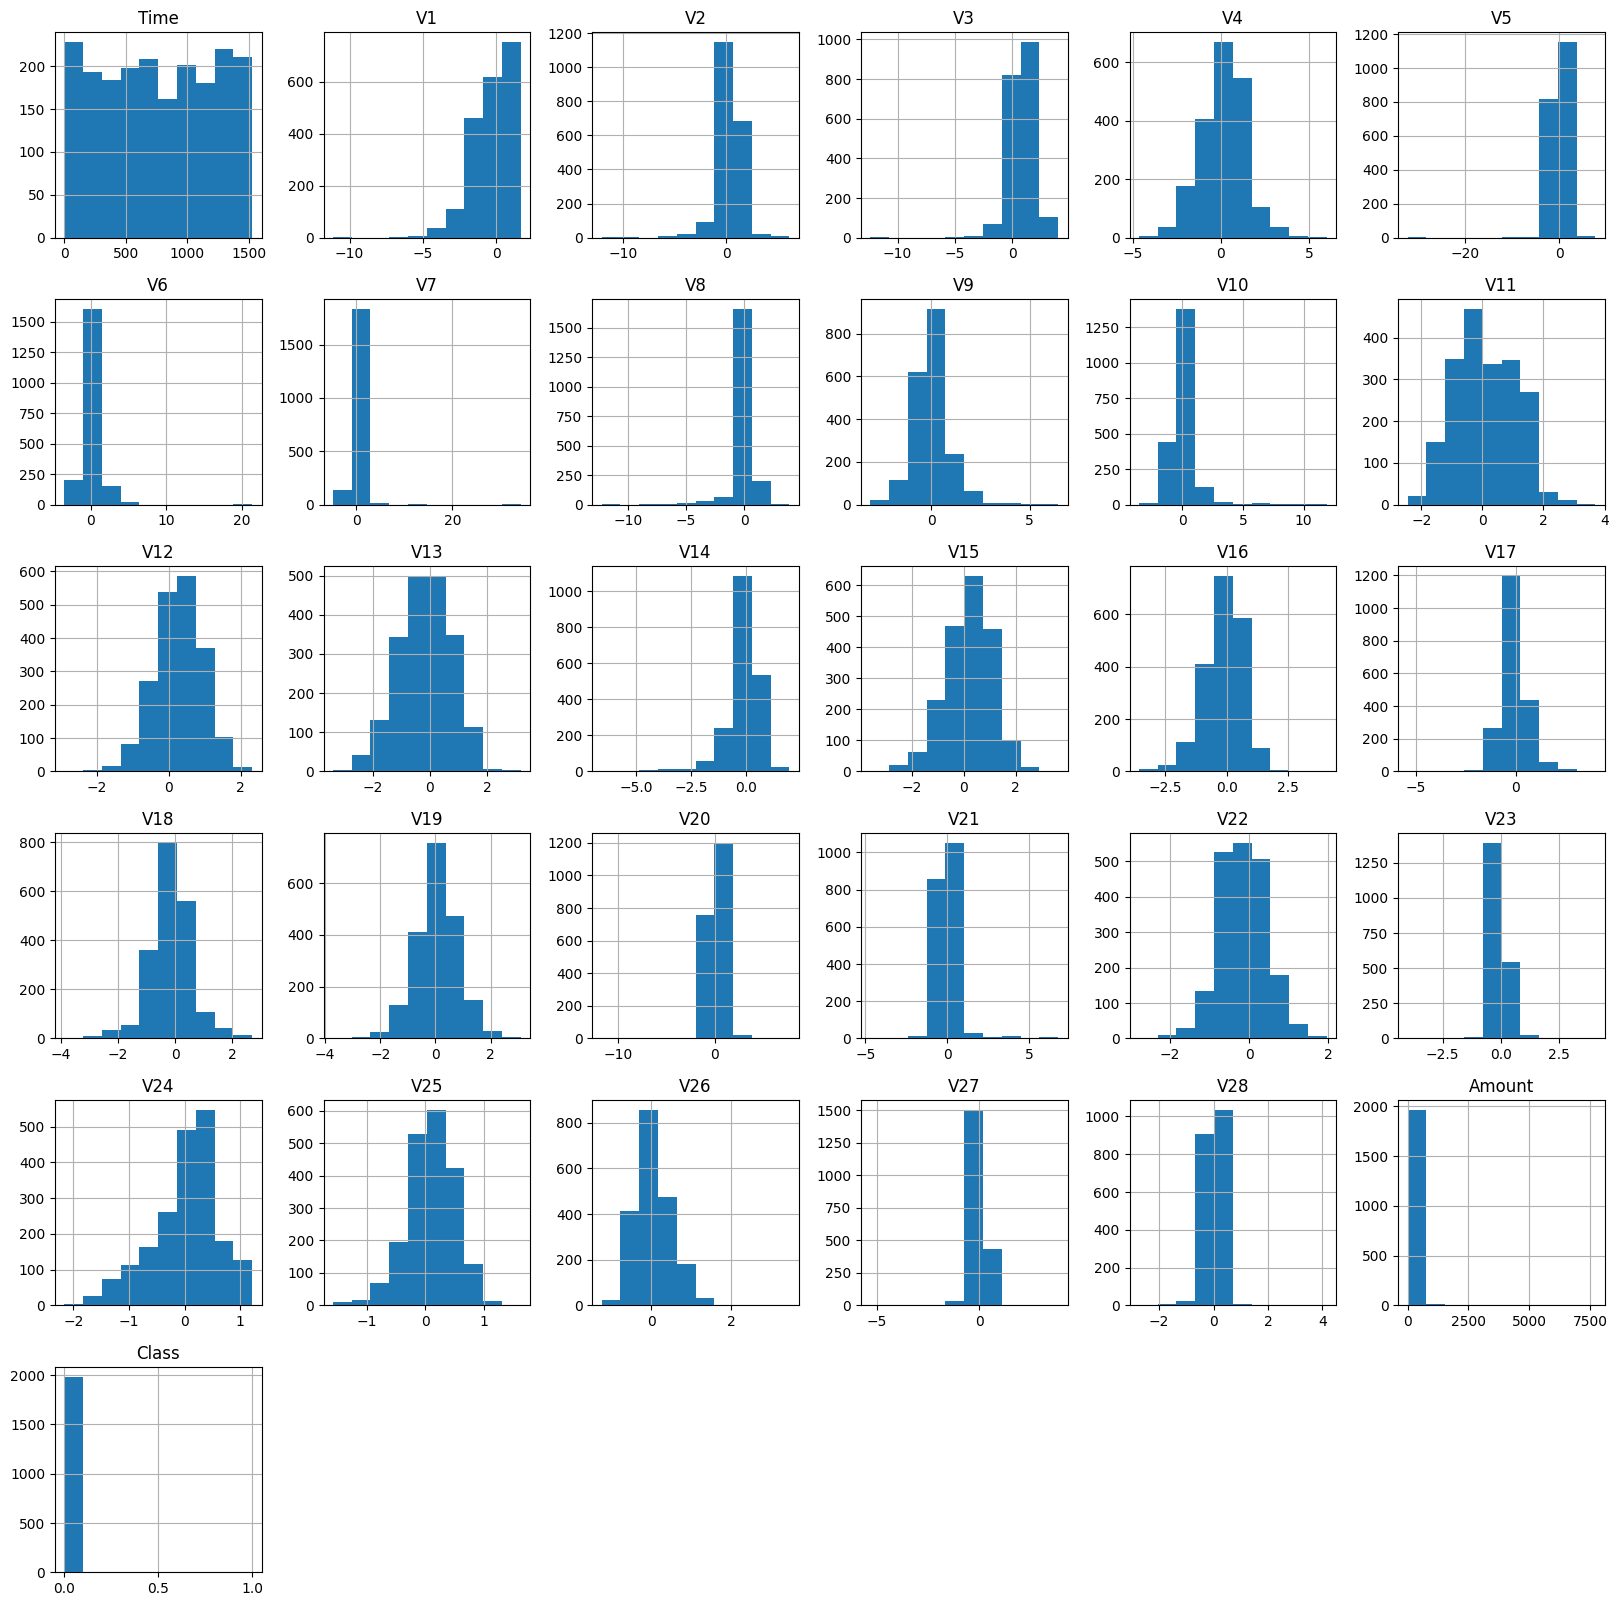

In [13]:
df_2.hist(figsize = (20,20)) #Cada aba do histograma terá 5 polegadas por 5

In [14]:
import sklearn.preprocessing as StandardScanler
escala = LabelEncoder.StandardScaler()

In [15]:
X = pd.DataFrame(escala.fit_transform(df_2.drop(["Class"],axis = 1)))
y = df_2.Class

In [16]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.687683,-0.794932,-0.297004,1.667549,0.972236,-0.205041,0.323333,0.088819,0.163222,0.389772,...,0.339521,-0.010254,0.717889,-0.191123,0.088261,0.049457,-0.525223,0.287937,-0.069779,0.335315
1,-1.687683,1.090375,-0.000152,-0.672832,0.236131,0.107992,-0.104198,-0.190298,0.149153,-0.298149,...,-0.222169,-0.327953,-0.840661,0.409107,-0.588323,0.144194,0.168423,-0.097945,0.061372,-0.272798
2,-1.685464,-0.793858,-1.407038,0.913907,0.182012,-0.334610,1.373514,0.572592,0.317375,-1.697104,...,0.818968,0.397542,1.557681,2.699699,-1.169533,-1.069262,-0.415083,-0.223475,-0.211639,1.283265
3,-1.685464,-0.504167,-0.395489,0.933445,-0.801889,0.052726,0.939274,0.087075,0.451642,-1.555312,...,-0.465696,-0.148062,0.254386,-0.417445,-1.978381,1.321830,-0.597478,0.096174,0.232685,0.227210
4,-1.683245,-0.645998,0.535504,0.692209,0.200418,-0.259165,0.035722,0.398566,-0.218835,0.894095,...,0.614903,0.003338,1.602913,-0.267609,0.211908,-0.770976,0.997244,0.520384,0.796095,0.005743
5,-1.683245,-0.104960,0.608012,0.289671,-0.251760,0.391659,-0.062891,0.296229,0.330452,-0.646154,...,0.047816,-0.301121,-0.706580,0.047187,-0.640849,-0.836661,0.124427,0.613569,0.304617,-0.268742
6,-1.678808,1.118304,-0.109762,-0.792434,0.833292,0.211617,0.174468,-0.125740,0.145129,0.502171,...,-0.486017,-0.239046,-0.214931,-0.314790,-1.320517,1.573837,-0.675226,0.019791,0.026340,-0.263279
7,-1.672152,-0.266254,1.008661,0.223773,-0.508167,0.806546,0.296438,0.861149,-3.879043,0.669276,...,-0.375797,2.993828,-1.481391,0.285001,-1.103713,-1.284149,-0.222493,-3.340949,-3.971189,-0.115069
8,-1.672152,-0.450980,0.017371,-0.949024,-0.333502,2.158727,2.881410,0.203259,0.941744,-0.449931,...,-0.008673,-0.094657,-0.210479,-0.456878,1.659509,0.649464,-0.954703,-0.041824,0.529416,0.101804
9,-1.667714,-0.040159,0.747334,0.194132,-0.294450,0.453249,-0.233224,0.449973,0.133049,-0.832857,...,0.255923,-0.360322,-0.832296,-0.220375,-0.663509,-0.436778,0.098629,0.592927,0.311931,-0.268701


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[595   0]
 [  1   0]]


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       595
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       596
   macro avg       0.50      0.50      0.50       596
weighted avg       1.00      1.00      1.00       596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

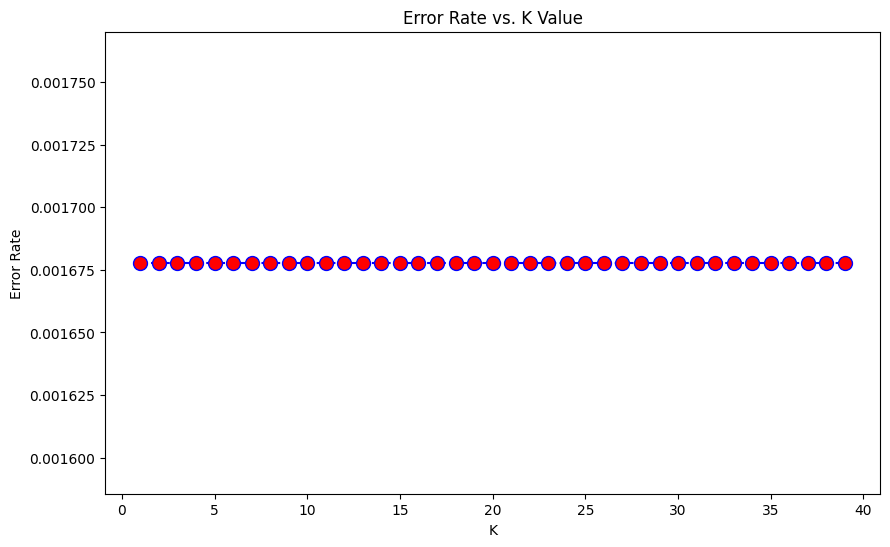

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[595   0]
 [  1   0]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       595
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       596
   macro avg       0.50      0.50      0.50       596
weighted avg       1.00      1.00      1.00       596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


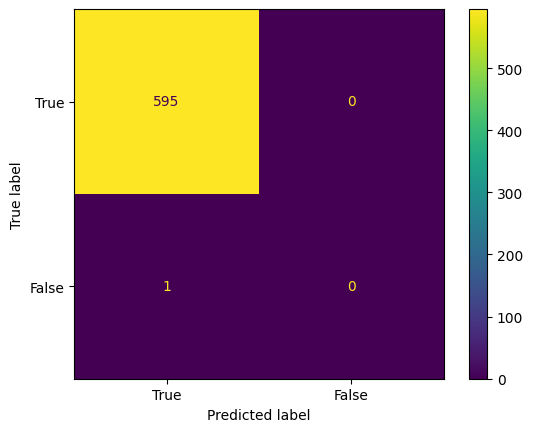

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred)
vis = ConfusionMatrixDisplay(confusion_matrix = conf_matrix,display_labels = [True,False])
vis.plot()
plt.grid(False)
plt.show()